File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0000.txt                  2022-11-24 11:23:12     91741530
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0001.txt                  2022-11-24 11:23:18     92793422
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0002.txt                  2022-11-24 11:23:26     95576204
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0003.txt                  2022-11-24 11:23:34     96033702
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0004.txt                  2022-11-24 11:23:40     95900857
File: 0
File: 1
File: 2
File: 3
File: 4


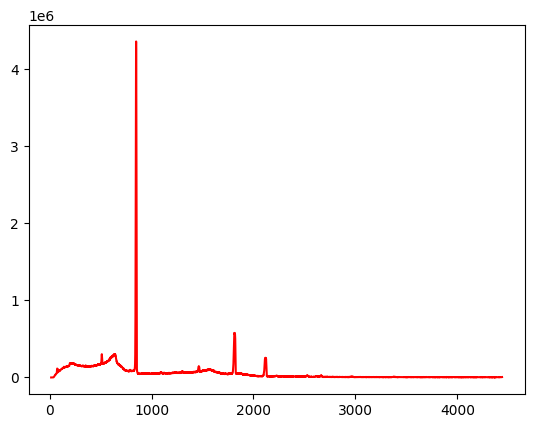

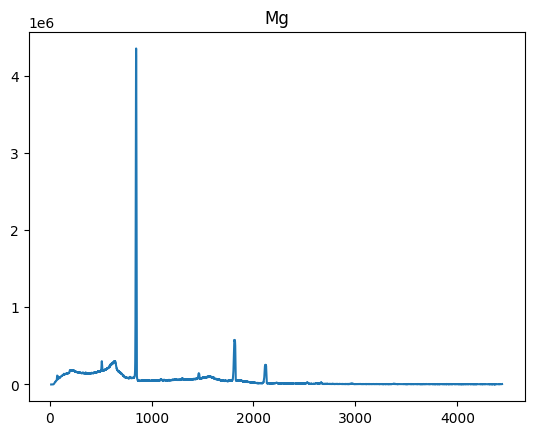

In [4]:
import numpy as np
import pandas as pd
import glob
import os
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from zipfile import ZipFile


  
# #specifying the zip file name
for i in range(5):
    file_name = f'Dag 2/Mg_data/Mg_1_maalning_dag2_ch000{i}.zip'
    
    # opening the zip file in READ mode
    with ZipFile(file_name, 'r') as ti:
        # printing all the contents of the zip file
        ti.printdir()
    
        # extracting all the files
        ti.extractall()

# a = 0.73971712
# ae = 9.9e-7
# b = 0.3785
# be = 1.4e-3

# data = []

#     data.append(np.loadtxt(f'Mg_1_maalning_dag2_ch000{i}.txt')[1])

def getCounts(j, lc: int = 20, hc: int = 6000):
    
    counts = []
    for i in range(j):
        print('File:', str(i))
        data = np.loadtxt(f"Mg_1_maalning_dag2_ch000{i}.txt")
        counts.append(data[:, 1])
    
    (x, y) = np.unique(np.concatenate(counts), return_counts=True)
    lI = np.where(x >= lc)[0][0]
    hI = np.where(x >= hc)[0][0]
    x = x[lI:hI]
    y = y[lI:hI]
    
    a = 0.73971712
    ae = 9.9e-7
    b = 0.3785
    be = 1.4e-3
    x  = x * a + b
    
    a = 22.68636096798056
    b = 0.004380390853720097
    usikkerheder: [6.52763544e+00, 5.95806196e-03]    
    eff = a *1 / x + b
    y = y / eff


    return (x, y)

Line = [3445.279,3369.91,3122.908,2959.935,2657.547,2085.064,846.77]
line = [2598.438, 3369.81,2523.06,1037.833,2113.092,1810.726, 1238.27]


plt.vlines(Line, 0, 10000, colors='r', linestyles='dashed')
plt.vlines(line, 0, 10000, colors='b', linestyles='dashed')



Mg1 = getCounts(5)
# Mg2 = getCounts(1)
# Mg3 = getCounts(2)
# Mg4 = getCounts(3)
# Mg5 = getCounts(4)


# ener = np.concatenate([Mg1[0], Mg2[0] , Mg3[0] , Mg4[0] , Mg5[0]])
# Coun = np.concatenate([Mg1[1], Mg2[1] , Mg3[1] , Mg4[1] , Mg5[1]])

plt.plot(Mg1[0], Mg1[1], color="r", label="data")
plt.show()

# plt.vlines(Line, 0, 10000, colors='r', linestyles='dashed')
# plt.vlines(line, 0, 10000, colors='b', linestyles='dashed')

plt.plot(Mg1[0], Mg1[1])
plt.title('Mg')

plt.show()




def gaussFit(x, mu, sig, a, b, c):
    lny = np.log(a) - ((x-mu)**2)/(2*sig**2)
    return np.exp(lny) - (b*x+c)



In [5]:

def getChannel(name: str, data:tuple , lower_limit: int, upper_limit: int, x_1:int, x_2:int, guess: [int, int, int], guess2 = [0,0]):
    x = data[0][lower_limit:upper_limit]
    y = data[1][lower_limit:upper_limit]


    print('x_min',x[0],'x_max',x[-1], 'y_min',y[0],'y_max', y[-1])
    plt.plot(x, y, color="r", label="data")
    yler = np.sqrt(y)
    pinit = guess + guess2
    xhelp = np.linspace(x_1, x_2, 500)
    print('heplmin',xhelp[0],'helpmax',xhelp[-1])
    popt, pcov = curve_fit(gaussFit, x, y, p0=pinit, sigma=yler, absolute_sigma=True)
    print(name)
    print('mu :', popt[0])
    print('sigma :', popt[1])
    print('scaling', popt[2])
    print('background', popt[3], popt[4])
    perr = np.sqrt(np.diag(pcov))
    print('usikkerheder:', perr)
    chmin = np.sum(((y - gaussFit(x, *popt)) / yler) ** 2)
    print('chi2:', chmin, ' ---> p:', ss.chi2.cdf(chmin, 4))

    
    plt.plot(xhelp, gaussFit(xhelp, *popt), 'k-.', label="gaussfit")
    plt.legend()

    plt.title(name)
    plt.grid()
    plt.show()


    return [popt, perr, name]


In [6]:
def t(x):
    return int(x/ a - b)

def effect(x):
    a = 180.66341379895778
    b = 0.034598909761420625
    usikkerheder: [6.52763544e+00, 5.95806196e-03]    
    return a *1 / x +b


x_min 828.8616744000001 x_max 902.0936692800001 y_min 91052.55464230709 y_max 46936.98019650237
heplmin 800.0 helpmax 900.0
Mg E=846.77
mu : 848.278759441343
sigma : 3.040907585351354
scaling 4497871.631093508
background 804.2929279387472 -759504.4857961965
usikkerheder: [4.80281265e-04 3.70422533e-04 8.30425250e+02 1.47511599e+00
 1.29314379e+03]
chi2: 958296.8260569116  ---> p: 1.0


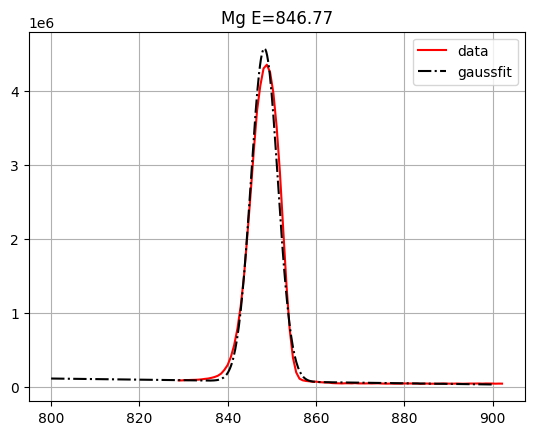

x_min 2071.5864359999996 x_max 2087.1204955199996 y_min 19893.56280339742 y_max 17639.24620274947
heplmin 2075.0 helpmax 2088.0
Mg E=2085.0
mu : 2084.124667781154
sigma : 0.08744347689666469
scaling 1254.3720284664873
background 55.83268227122308 -133952.1834901765
usikkerheder: [           nan            nan            nan 6.23960224e+00
 1.29733688e+04]
chi2: 1277.931019554506  ---> p: 1.0


C:\Users\David\AppData\Local\Temp\ipykernel_6860\4139566839.py:96: RuntimeWarning: invalid value encountered in log
  lny = np.log(a) - ((x-mu)**2)/(2*sig**2)
C:\Users\David\AppData\Local\Temp\ipykernel_6860\3193590976.py:18: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


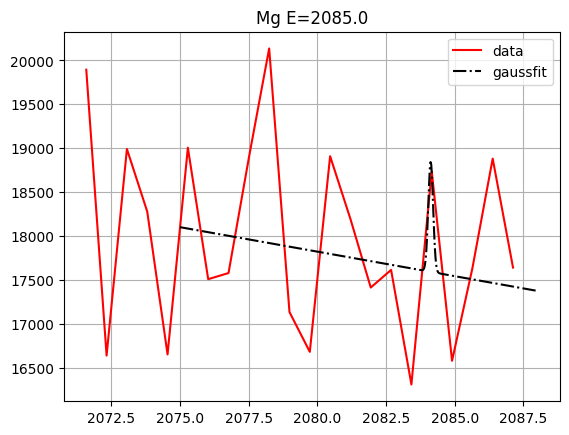

x_min 1124.7485224 x_max 1345.92394128 y_min 59428.39465102417 y_max 65549.08350683696
heplmin 1100.0 helpmax 1300.0
Mg E=1238.27
mu : 1230.1452149952534
sigma : 0.19281534963723196
scaling 7598.2188831543
background -49.454478117677084 1041.026011265871
usikkerheder: [1.70289020e+02 1.24045364e+03 1.59167253e+08 2.20158821e-01
 2.71599332e+02]
chi2: 78986.83982619451  ---> p: 1.0


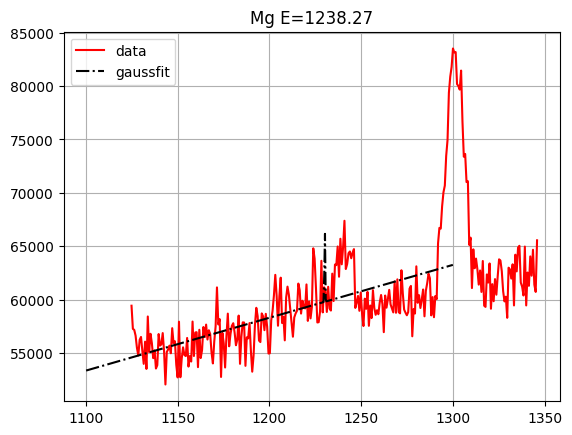

x_min 2234.3242023999996 x_max 2973.30160528 y_min 18714.79184980978 y_max 10740.678610505427
heplmin 2500.0 helpmax 2800.0
Mg E=2657.54
mu : 2662.0054316535707
sigma : 6.889682041982242
scaling 15531.706115662275
background 13.45786271381657 -44733.45281036783
usikkerheder: [2.02156334e-02 1.85972882e-02 4.37855915e+01 1.45973345e-02
 3.90539150e+01]
chi2: 528427.5708610245  ---> p: 1.0


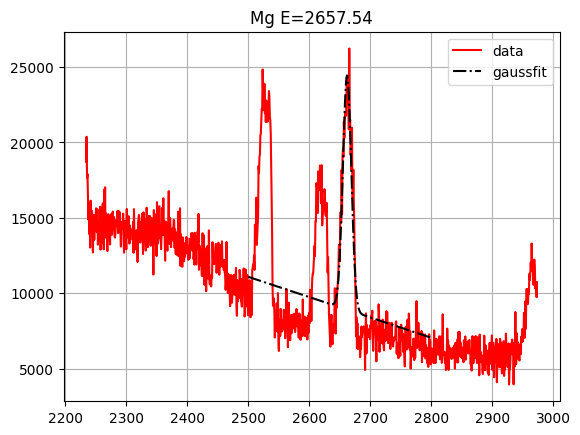

x_min 1716.5222184000002 x_max 1937.69763728 y_min 48019.93396108131 y_max 35740.28931418726
heplmin 1750.0 helpmax 1900.0
Mg E=1810.72
mu : 1813.7841097632595
sigma : -5.983892334629935
scaling 592279.0847381203
background 50.675395719540504 -138125.23028615635
usikkerheder: [2.07758668e-03 1.66630385e-03 2.25373227e+02 1.87601992e-01
 3.44547180e+02]
chi2: 572574.4784076255  ---> p: 1.0


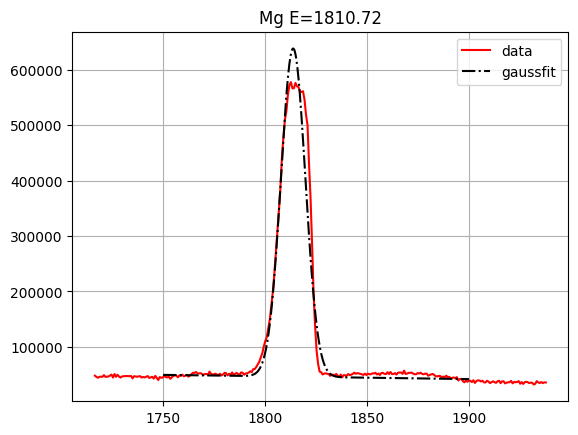

x_min 2826.0978984 x_max 3047.27331728 y_min 7656.448639598528 y_max 6511.5190939474705
heplmin 2900.0 helpmax 3000.0
Mg E=2959.03
mu : 2965.7277838247637
sigma : 8.720786734315794
scaling 6337.712673380729
background 3.334316046394183 -15518.56376010548
usikkerheder: [4.02466851e-02 3.96554753e-02 2.80509466e+01 7.08814377e-02
 2.07844140e+02]
chi2: 28335.764102190748  ---> p: 1.0


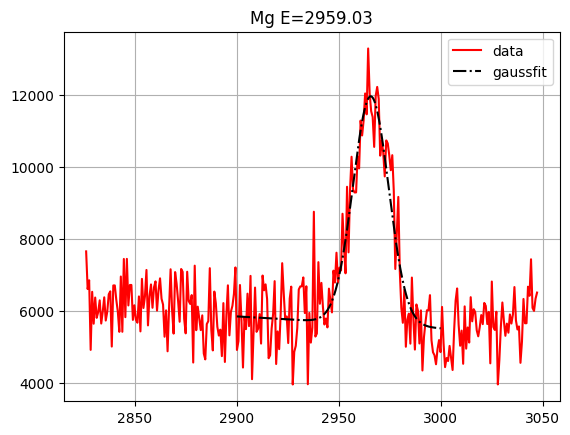

x_min 3048.0130344 x_max 3173.0252276799997 y_min 7189.138984122283 y_max 6157.76985060291
heplmin 3000.0 helpmax 3200.0
Mg E=3122.908
mu : 3122.7990815679577
sigma : 0.08198105326956581
scaling 2714.7501703479625
background 1.4457308996459906 -9761.983253145285
usikkerheder: [3.55399916e+05 3.70727600e+05 8.58993459e+09 1.53090950e-01
 4.76269854e+02]
chi2: 15651.054673962451  ---> p: 1.0


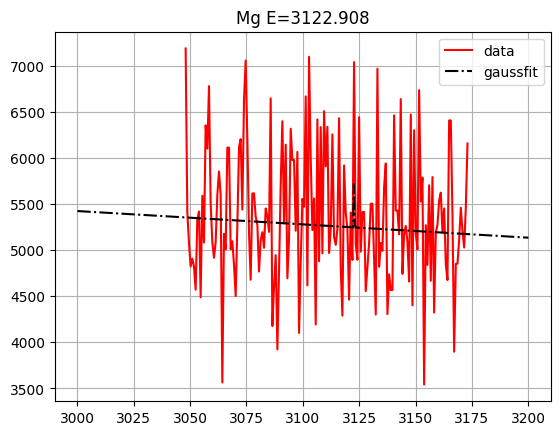

x_min 2027.2034088 x_max 2248.3788276799996 y_min 20101.01221099376 y_max 14857.826414922893
heplmin 2000.0 helpmax 2200.0
Mg E=2113.09
mu : 2116.1799108399705
sigma : 6.6694046127981474
scaling 267620.2325876656
background 13.10110518440979 -44416.98551574886
usikkerheder: [3.21687781e-03 2.51364344e-03 1.40858595e+02 1.20596978e-01
 2.58932702e+02]
chi2: 389868.25897356775  ---> p: 1.0


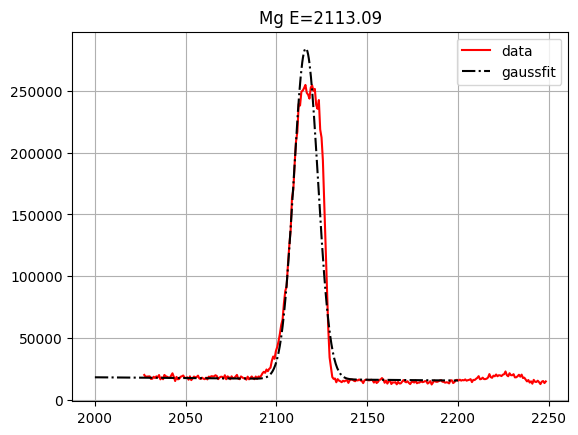

x_min 1006.3937832 x_max 1079.6257780800001 y_min 49289.40485551619 y_max 53675.02258871213
heplmin 1020.0 helpmax 1050.0
Mg E=1037.833
mu : 1037.010952494998
sigma : 0.41327941212884445
scaling 39.76167292640952
background -31.597918470086196 -17605.54354008079
usikkerheder: [3.91575396e+00 7.66514920e+00 6.14009784e+02 1.05518167e+00
 1.10073909e+03]
chi2: 3467.844612469202  ---> p: 1.0


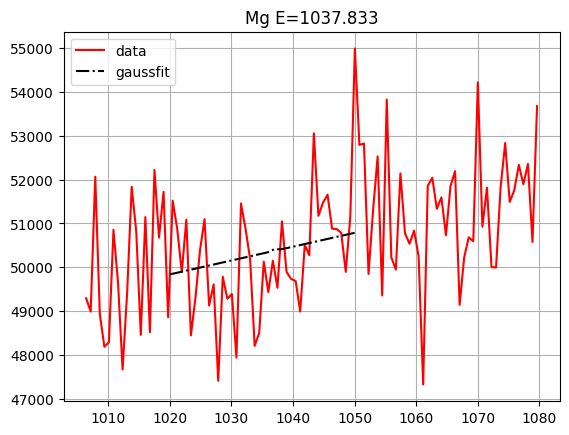

x_min 3048.0130344 x_max 4008.9055732799998 y_min 7189.138984122283 y_max 4482.347638374897
heplmin 3200.0 helpmax 3500.0
Mg E=3369.9
mu : 3377.4260223117353
sigma : 10.524968703182635
scaling 2079.992008728343
background 0.8465482703278848 -7825.172855966556
usikkerheder: [1.12223336e-01 1.08354930e-01 1.97958836e+01 7.05621359e-03
 2.51412323e+01]
chi2: 135752.3246455745  ---> p: 1.0


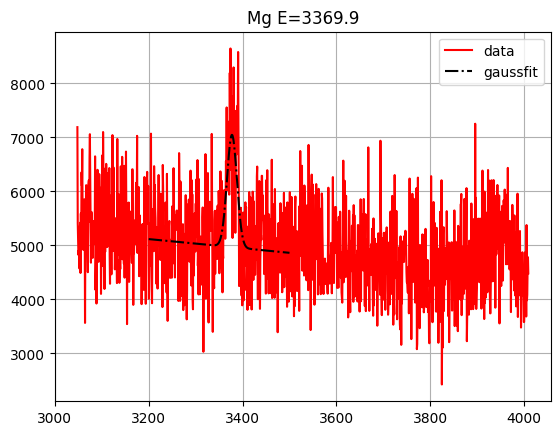

x_min 2382.2676263999997 x_max 2603.4430452799998 y_min 14025.344381778603 y_max 8171.447772498927
heplmin 2400.0 helpmax 2600.0
Mg E=2523.06
mu : 2526.6560378067547
sigma : 7.937979479460331
scaling 15324.819386283147
background 28.43506652566927 -81121.69360559738
usikkerheder: [2.21975988e-02 2.08943947e-02 4.10198734e+01 9.30842096e-02
 2.32601064e+02]
chi2: 40120.45919951419  ---> p: 1.0


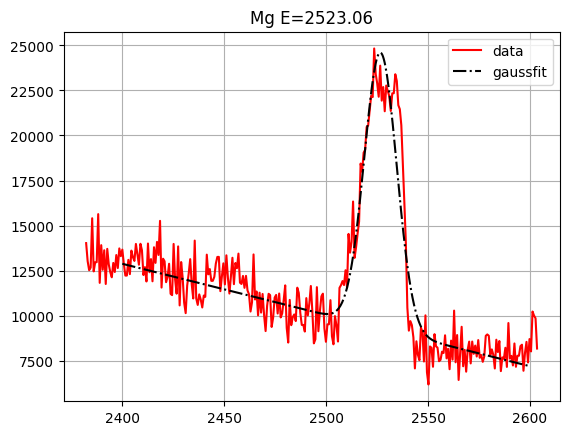

x_min 2567.1969064 x_max 2603.4430452799998 y_min 7187.491368380656 y_max 8171.447772498927
heplmin 2580.0 helpmax 2600.0
Mg E=2598.43
mu : 2601.9006604221718
sigma : 0.867551470204957
scaling 2548.0792164232903
background 2.188834030171776 -13548.64755701172
usikkerheder: [3.23567532e-02 3.40559279e-02 8.77350651e+01 1.40307160e+00
 3.62450974e+03]
chi2: 2218.8674244362037  ---> p: 1.0


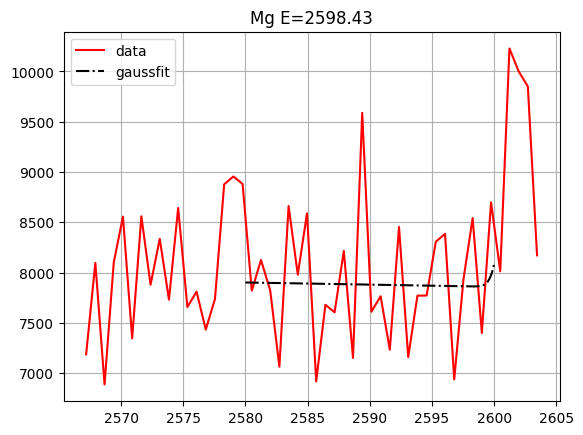

In [7]:
chs = []

chs += [getChannel("Mg E=846.77", Mg1,  1100, 1200, 800, 900, [850, 20, 100000])]
chs += [getChannel("Mg E=2085.0", Mg1, 2780, 2802, 2075,2088, [2085, 0.1, 500])]    
chs += [ getChannel("Mg E=1238.27", Mg1, 1500, 1800,1100,1300, [1230, 0.5, 20000])]
chs += [ getChannel("Mg E=2657.54", Mg1, 3000, 4000, 2500,2800, [2650, 20, 200000])]
chs += [ getChannel("Mg E=1810.72", Mg1, 2300, 2600, 1750,1900,[1810, 25, 20000])]
chs += [ getChannel("Mg E=2959.03", Mg1, 3800, 4100, 2900,3000, [2950, 10, 20000])] 
chs += [getChannel("Mg E=3122.908", Mg1, 4100, 4270, 3000, 3200, [3122, 0.1, 20000])]
chs += [ getChannel("Mg E=2113.09", Mg1, 2720, 3020, 2000,2200, [2120, 10, 20000])]
chs += [ getChannel("Mg E=1037.833", Mg1, 1340, 1440,1020,1050, [1037, 0.5, 500000])]
chs += [ getChannel("Mg E=3369.9", Mg1, 4100, 5400,3200, 3500, [3360, 10, 20000])]
chs += [ getChannel("Mg E=2523.06", Mg1, 3200, 3500,2400,2600, [2520, 20, 50000])]
chs += [ getChannel("Mg E=2598.43", Mg1, 3450, 3500,2580,2600, [2598, 1, 2000])]

In [8]:
ch= np.array(chs)
ch

C:\Users\David\AppData\Local\Temp\ipykernel_6860\3110951003.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ch= np.array(chs)


array([[array([ 8.48278759e+02,  3.04090759e+00,  4.49787163e+06,  8.04292928e+02,
               -7.59504486e+05])                                                  ,
        array([4.80281265e-04, 3.70422533e-04, 8.30425250e+02, 1.47511599e+00,
               1.29314379e+03])                                               ,
        'Mg E=846.77'],
       [array([ 2.08412467e+03,  8.74434769e-02,  1.25437203e+03,  5.58326823e+01,
               -1.33952183e+05])                                                  ,
        array([           nan,            nan,            nan, 6.23960224e+00,
               1.29733688e+04])                                               ,
        'Mg E=2085.0'],
       [array([ 1.23014521e+03,  1.92815350e-01,  7.59821888e+03, -4.94544781e+01,
                1.04102601e+03])                                                  ,
        array([1.70289020e+02, 1.24045364e+03, 1.59167253e+08, 2.20158821e-01,
               2.71599332e+02])                       

In [9]:
#A = H * Sigma \sqrt(2pi)

def Areal(ch):
    t = ch[0]
    errs = ch[1]
    H = t[2]
    Herr = errs[2]
    Sigmaerr = errs[1]
    Sigma = t[1]
    A = H * Sigma * (2*np.pi)**0.5
    Aerr = A * np.sqrt((Herr/H)**2 + (Sigmaerr/Sigma)**2) * (2 * np.pi)**0.5
    return A, Aerr

Areals = [Areal(i) for i in chs]
Areals

[(34284688.870695576, 19008.896460051445),
 (274.94366197701663, nan),
 (3672.3438516003253, 201719062.85661995),
 (268230.57360264653, 2624.2136345631493),
 (-8883827.183119858, -10500.162510698836),
 (138540.94520217032, 2203.6546899836153),
 (557.8703718866593, 7717893559.071656),
 (4473999.626969296, 7259.950378799154),
 (41.19062235206219, 2491.845501829454),
 (54874.73218608787, 1928.488897305204),
 (304926.5715640468, 2869.393360836238),
 (5541.127072774364, 725.2583669697656)]

In [10]:

na = {}
errs = {}
for i in range(len(Areals)):
    na.update({chs[i][2][5:]: abs(Areals[i][0])})
    errs.update({chs[i][2][5:]: abs(Areals[i][1])})

print(na)
E7 = na['2598.43']
E6 = na['3369.9'] + na['2523.06']
E5 = na['1037.833']
E4 = na['2959.03'] + na['2113.09']
E3 = na['2657.54'] + na['1810.72']
E2 = na['1238.27'] - na['1037.833']
E1 = na['846.77'] - na['1238.27'] - na['1810.72'] - na['2113.09'] - na['2523.06'] - na['2598.43']

E = E7, E6, E5, E4, E3, E2, E1

print(E)

{'846.77': 34284688.870695576, '2085.0': 274.94366197701663, '1238.27': 3672.3438516003253, '2657.54': 268230.57360264653, '1810.72': 8883827.183119858, '2959.03': 138540.94520217032, '3122.908': 557.8703718866593, '2113.09': 4473999.626969296, '1037.833': 41.19062235206219, '3369.9': 54874.73218608787, '2523.06': 304926.5715640468, '2598.43': 5541.127072774364}
(5541.127072774364, 359801.30375013466, 41.19062235206219, 4612540.5721714655, 9152057.756722504, 3631.153229248263, 20612722.018117998)


In [11]:
print(E7/sum(E), E6/sum(E), E5/sum(E), E4/sum(E), E3/sum(E), E2/sum(E), E1/sum(E))

0.00015947371293601384 0.010355086442643827 1.1854666746235807e-06 0.13274898074912678 0.26339634740385515 0.00010450463959814645 0.5932344215851656


In [12]:
#5.714694020195774e-08 
# 0.008673919876131374 
# 1.384716376781397e-07 
# 0.13208059031217415 
# 0.26200498003779 
# 0.0013160651894827383 
# 0.5959242489658438

In [13]:
# groft estimering
#E7 = na['2598.43']
E6 = na['3369.9'] + na['2523.06'] 
E6er = ((errs['3369.9'])**2 + (errs['2523.06'])**2)**0.5
#E5 = na['1037.833']
E4 = na['2959.03'] + na['2113.09']
E4er = ((errs['2959.03'])**2 + (errs['2113.09'])**2)**0.5
E3 = na['2657.54'] + na['1810.72']
E3er = ((errs['2657.54'])**2 + (errs['1810.72'])**2)**0.5
#E2 = na['1238.27'] - na['1037.833']
E1 = na['846.77'] - na['1810.72'] - na['2113.09'] - na['2523.06']
E1er = ((errs['846.77'])**2 + (errs['1810.72'])**2 + (errs['2113.09'])**2 + (errs['2523.06'])**2)**0.5


E =  E6, E4, E3, E1
Eer = E6er, E4er, E3er, E1er

sumEer = sum([x **2 for x in Eer])**0.5
ERRR = ((E6er/E6)**2 + (sumEer/sum(E))**2)**0.5, ((E4er/E4)**2 + (sumEer/sum(E))**2)**0.5, ((E3er/E3)**2 + (sumEer/sum(E))**2)**0.5, ((E1er/E1)**2 + (sumEer/sum(E))**2)**0.5
print(E6/sum(E), E4/sum(E), E3/sum(E), E1/sum(E))
print(ERRR)


0.010355086442643826 0.13274898074912675 0.2633963474038551 0.5934995854043743
(0.009639687230515061, 0.0018169452972650658, 0.0014121652936359018, 0.0013593868523421493)


In [37]:
print(na['3369.9']/E6, na['2523.06']/E6,'E6', '\n',((errs['3369.9']/na['3369.9'])**2 + (E6er/E6)**2)**0.5, ((errs['2523.06']/na['2523.06'])**2 + (E6er/E6)**2)**0.5,'er','\n')
print(na['2959.03']/E4, na['2113.09']/E4,'E4', '\n', ((errs['2959.03']/na['2959.03'])**2 + (E4er/E4)**2)**0.5, ((errs['2113.09']/na['2113.09'])**2 + (E4er/E4)**2)**0.5,'er','\n')
print(na['2657.54']/E3, na['1810.72']/E3,'E3', '\n', ((errs['2657.54']/na['2657.54'])**2 + (E3er/E3)**2)**0.5, ((errs['1810.72']/na['1810.72'])**2 + (E3er/E3)**2)**0.5,'er','\n')


0.1525139892883652 0.8474860107116348 E6 
 0.03643338938219045 0.013449092656523243 er 

0.030035713081424192 0.9699642869185758 E4 
 0.015990984283115274 0.0023105722462618988 er 

0.02930822561796246 0.9706917743820376 E3 
 0.009854639303573554 0.001671975214984556 er 

